<a href="https://colab.research.google.com/github/Tamaghnatech/Pistachios/blob/main/Pistachios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Paths to the datasets
kp_image_dir = '/content/KP'  # Update with your path
sp_image_dir = '/content/SP'  # Update with your path
kp_features_path = '/content/KP/Pistachio_16_Features_Dataset.xls'
sp_features_path = '/content/SP/Pistachio_28_Features_Dataset.xls'


In [3]:
import pandas as pd
import os

# Paths to the image directories
kp_image_dir = '/content/KP'  # Update with your path
sp_image_dir = '/content/SP'  # Update with your path

# Create dataframes
kp_images = [{'filename': os.path.join(kp_image_dir, fname), 'class': 'KP'} for fname in os.listdir(kp_image_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]
sp_images = [{'filename': os.path.join(sp_image_dir, fname), 'class': 'SP'} for fname in os.listdir(sp_image_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Combine into one dataframe
image_df = pd.DataFrame(kp_images + sp_images)


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split the dataframe into training and validation sets
train_df, val_df = train_test_split(image_df, test_size=0.2, stratify=image_df['class'])

# Create ImageDataGenerators for training and validation
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 1718 validated image filenames belonging to 2 classes.
Found 430 validated image filenames belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' if it's a multi-class classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can adjust the number of epochs based on your requirement
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
53/53 [==============================] - 119s 2s/step - loss: 0.4842 - accuracy: 0.7633 - val_loss: 0.3793 - val_accuracy: 0.8269
Epoch 2/10
53/53 [==============================] - 105s 2s/step - loss: 0.3685 - accuracy: 0.8339 - val_loss: 0.3684 - val_accuracy: 0.8389
Epoch 3/10
53/53 [==============================] - 106s 2s/step - loss: 0.3260 - accuracy: 0.8547 - val_loss: 0.3462 - val_accuracy: 0.8558
Epoch 4/10
53/53 [==============================] - 105s 2s/step - loss: 0.2999 - accuracy: 0.8689 - val_loss: 0.3324 - val_accuracy: 0.8702
Epoch 5/10
53/53 [==============================] - 102s 2s/step - loss: 0.2668 - accuracy: 0.8796 - val_loss: 0.2805 - val_accuracy: 0.8870
Epoch 6/10
53/53 [==============================] - 114s 2s/step - loss: 0.2279 - accuracy: 0.9015 - val_loss: 0.3282 - val_accuracy: 0.8702
Epoch 7/10
53/53 [==============================] - 108s 2s/step - loss: 0.2033 - accuracy: 0.9193 - val_loss: 0.2846 - val_accuracy: 0.8798
Epoch 8/10
53

14/14 [==============================] - 13s 890ms/step - loss: 0.3860 - accuracy: 0.8744
Validation Accuracy: 0.8744186162948608


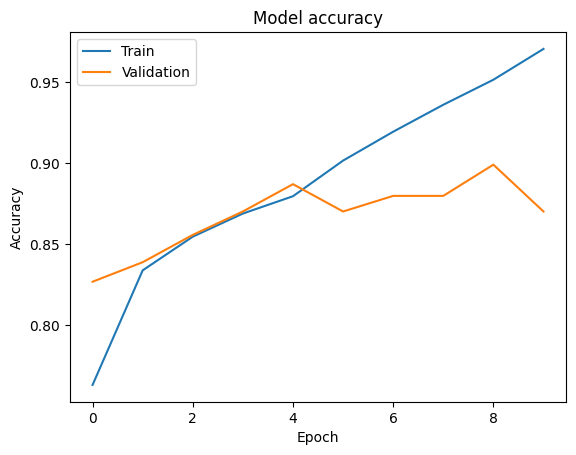

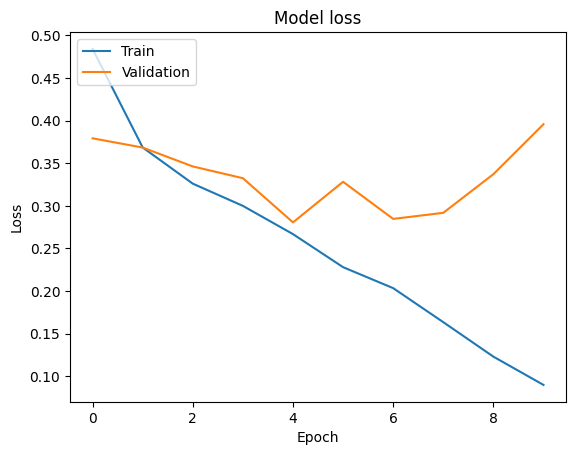

In [7]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_accuracy}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
# Reset the validation generator
val_generator.reset()

# Predict the validation set
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)


14/14 [==============================] - 9s 568ms/step


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the actual class labels
actual_classes = val_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
cr = classification_report(actual_classes, predicted_classes, target_names=val_generator.class_indices.keys())
print("Classification Report:")
print(cr)


Confusion Matrix:
[[247   0]
 [183   0]]
Classification Report:
              precision    recall  f1-score   support

          KP       0.57      1.00      0.73       247
          SP       0.00      0.00      0.00       183

    accuracy                           0.57       430
   macro avg       0.29      0.50      0.36       430
weighted avg       0.33      0.57      0.42       430



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
model.save('my_model.h5')


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

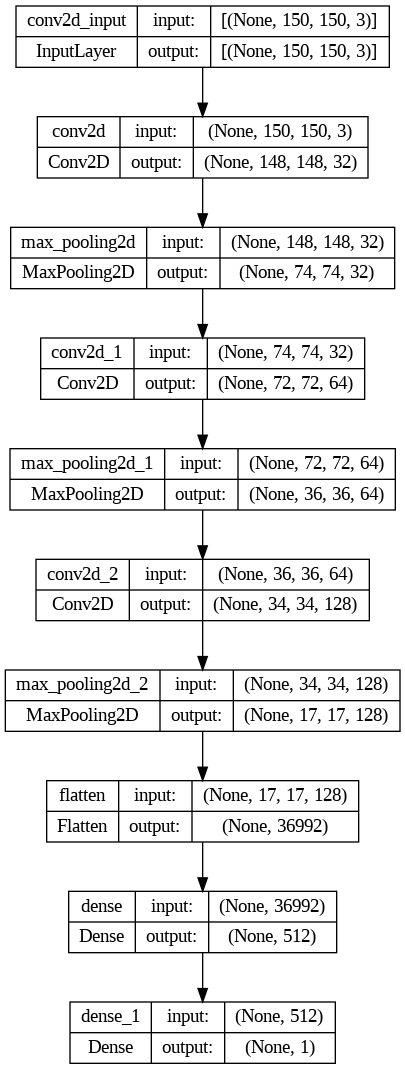

In [14]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load an image file
img_path = '/content/SP/siirt (14).jpg'  # Replace with your image path
img = Image.open(img_path)

# Resize the image to the size your model expects
img = img.resize((150, 150))  # Replace 150, 150 with the input size of your model

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Scale the image (if your model expects scaled inputs)
img_array = img_array / 255.0

# Expand dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)



1/1 [==============================] - 0s 214ms/step


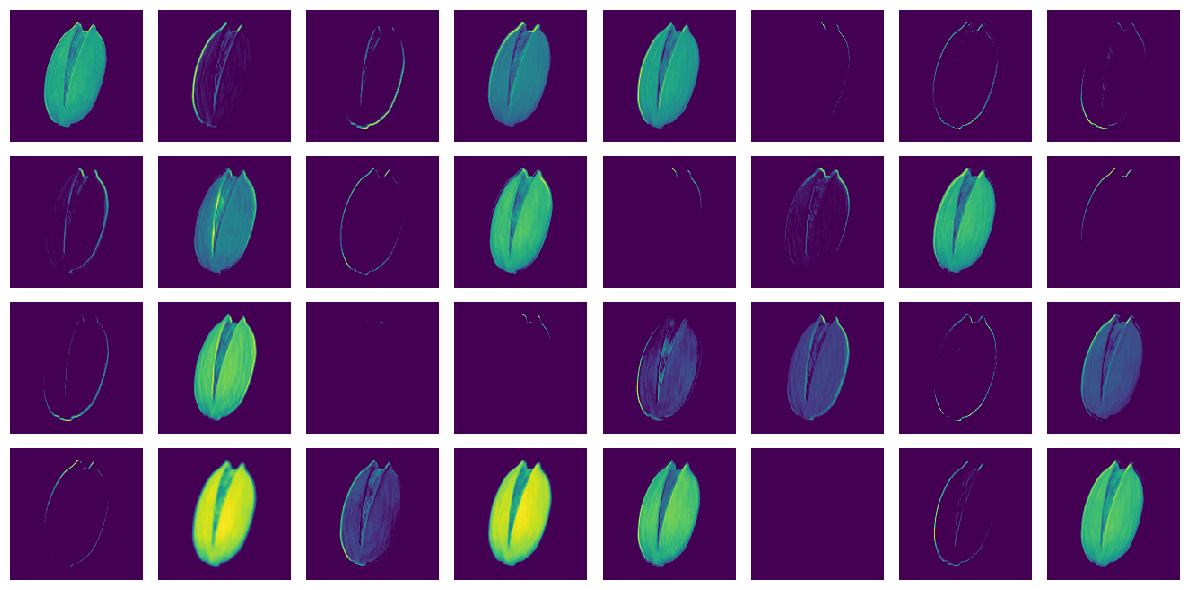

In [20]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Assuming 'model' is your trained CNN model
layer_outputs = [layer.output for layer in model.layers[:8]]  # Extracts the outputs of the top 8 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)  # Creates a model that will return these outputs, given the model input

# Use img_array as your preprocessed image
activations = activation_model.predict(img_array)  # img_array is the preprocessed image

# Visualize the activations of the first layer
first_layer_activation = activations[0]

# Set up the number of columns for your subplots
n_cols = 8  # Adjust based on how many feature maps you want to display
n_rows = first_layer_activation.shape[-1] // n_cols

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 1.5, n_rows * 1.5))

# Plot each channel of the first layer
for i in range(n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()
